In [8]:
import pandas as pd
import numpy as np


In [9]:
df = pd.read_csv("./desktop/dataset/House_Rent_Dataset.csv")

In [10]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [12]:
drop_col = ["Posted On", "Floor","Tenant Preferred","Point of Contact"]

In [13]:
df.drop(columns=drop_col,inplace=True)

In [14]:
df.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Bathroom
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,1
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,1
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,1
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,1


In [15]:
df = df.iloc[:, [0,2,3,4,5,6,7,1]]

In [16]:
df.isnull().sum()

BHK                  0
Size                 0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Bathroom             0
Rent                 0
dtype: int64

In [17]:
df.head()

,BHK,Size,Area Type,Area Locality,City,Furnishing Status,Bathroom,Rent
0,2,1100,Super Area,Bandel,Kolkata,Unfurnished,2,10000
1,2,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,1,20000
2,2,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,1,17000
3,2,800,Super Area,Dumdum Park,Kolkata,Unfurnished,1,10000
4,2,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,1,7500


# Plotting

In [18]:
import seaborn as sns

from matplotlib import pyplot as plt

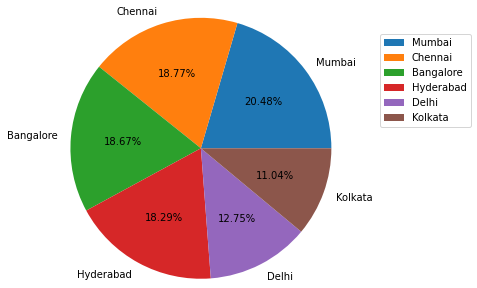

In [19]:
plt.pie(df["City"].value_counts().values , labels = df["City"].value_counts().index, autopct='%1.2f%%', radius=1.5)

plt.legend(bbox_to_anchor=(1.3, 1.05))
plt.show() 

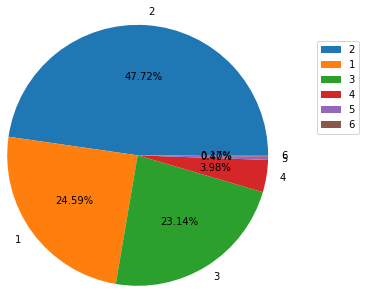

In [20]:
plt.pie(df["BHK"].value_counts().values , labels = df["BHK"].value_counts().index, autopct='%1.2f%%', radius=1.5)

plt.legend(bbox_to_anchor=(1.3, 1.05))
plt.show() 

Text(0, 0.5, 'Rent')

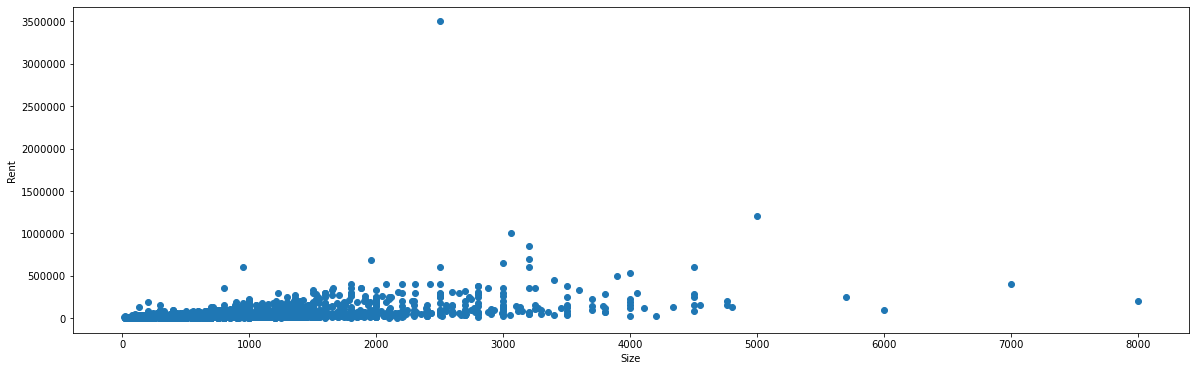

In [21]:
plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
plt.scatter(df["Size"], df["Rent"])
plt.xlabel("Size")
plt.ylabel("Rent")

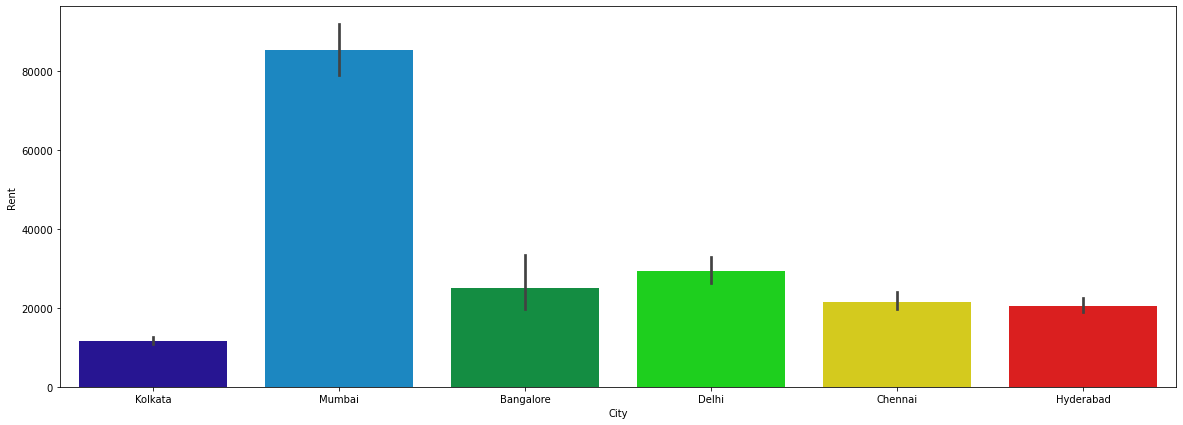

In [22]:
plt.figure(figsize = (20, 7))
sns.barplot(x = df["City"], y = df["Rent"], palette = "nipy_spectral");

# Remove Outliers

In [23]:
cat_x = df.select_dtypes(include=['object']).columns.tolist()
num_x = df.select_dtypes(include=['int']).columns.tolist()
num_x

['BHK', 'Size', 'Bathroom', 'Rent']

In [24]:
for i in df[num_x]:
    for x in df["City"].unique():
        selected_spec = df[df["City"] == x]
        selected_column = selected_spec[i]
        
        q1 = selected_column.quantile(0.25)
        q3 = selected_column.quantile(0.75)
        iqr = q3 - q1
        
        minimum = q1-1.5 * iqr
        maximum = q3+1.5 * iqr
        
        max_id = df[(df["City"] == x) & (df[i] > maximum)].index
        min_id = df[(df["City"] == x) & (df[i] < minimum)].index
        
        df.drop(index=max_id , inplace=True)
        df.drop(index=min_id , inplace=True)
        
       
        
       
        
        

Text(0, 0.5, 'Rent')

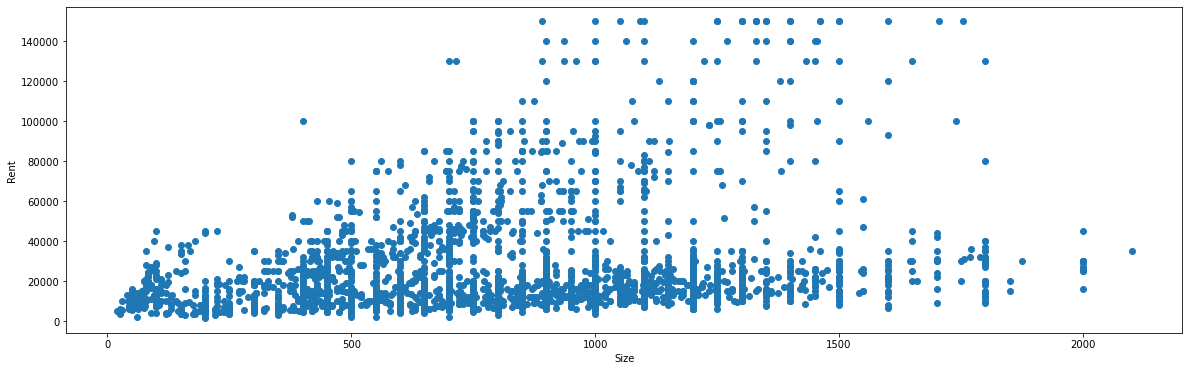

In [25]:
plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
plt.scatter(df["Size"], df["Rent"])
plt.xlabel("Size")
plt.ylabel("Rent")

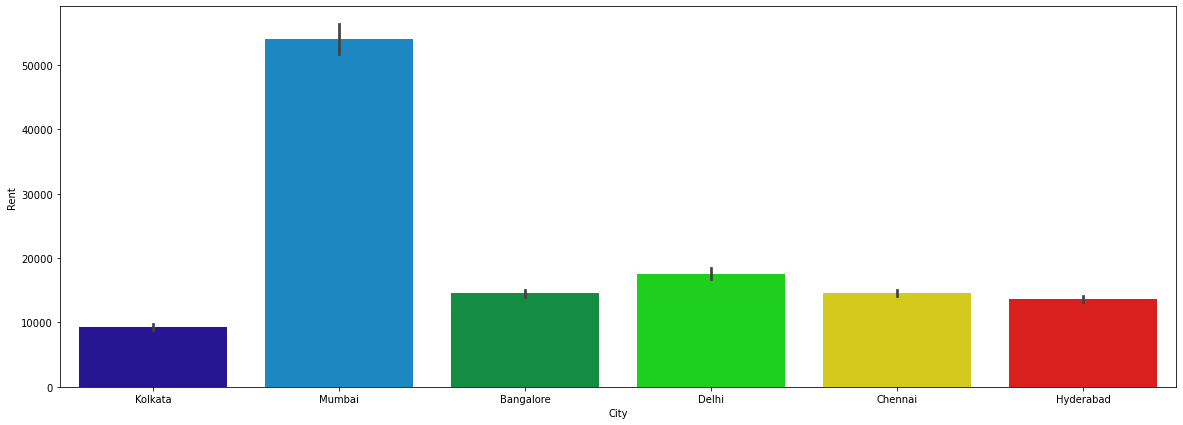

In [26]:
plt.figure(figsize = (20, 7))
sns.barplot(x = df["City"], y = df["Rent"], palette = "nipy_spectral");

# Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
for i in df:
    if i in cat_x:
        df[i] = le.fit_transform(df[i])
    else:
        print("There are no values withoud encode")

There are no values withoud encode
There are no values withoud encode
There are no values withoud encode
There are no values withoud encode


In [29]:
df.head()

,BHK,Size,Area Type,Area Locality,City,Furnishing Status,Bathroom,Rent
0,2,1100,2,182,4,2,2,10000
1,2,800,2,1287,4,1,1,20000
2,2,1000,2,1479,4,1,1,17000
3,2,800,2,444,4,2,1,10000
4,2,850,1,1594,4,2,1,7500


In [30]:
df.corr()

,BHK,Size,Area Type,Area Locality,City,Furnishing Status,Bathroom,Rent
BHK,1.000000,0.629204,-0.065013,0.010878,0.012890,-0.041429,0.681773,0.357675
Size,0.629204,1.000000,0.055588,-0.019321,-0.108690,-0.101362,0.577883,0.250245
Area Type,-0.065013,0.055588,1.000000,-0.017357,-0.320358,0.028940,-0.114747,-0.361223
Area Locality,0.010878,-0.019321,-0.017357,1.000000,-0.027412,0.002717,0.013889,-0.012430
City,0.012890,-0.108690,-0.320358,-0.027412,1.000000,0.035510,0.106379,0.473646
Furnishing Status,-0.041429,-0.101362,0.028940,0.002717,0.035510,1.000000,-0.104517,-0.198269
Bathroom,0.681773,0.577883,-0.114747,0.013889,0.106379,-0.104517,1.000000,0.512510
Rent,0.357675,0.250245,-0.361223,-0.012430,0.473646,-0.198269,0.512510,1.000000


# Train

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.drop('Rent',axis=1)
y = df['Rent']


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

# Scaling

In [34]:
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,0.5))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

# Predict

In [35]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [36]:
reg.fit(rescaledX_train,y_train)

LogisticRegression()

In [37]:
y_pred = reg.predict(rescaledX_test)

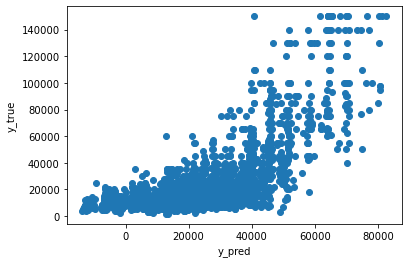

In [47]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
plt.scatter(lr.predict(X_train), y_train)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

In [48]:
data = pd.DataFrame({"Test":y_test,"predict":y_pred})

In [54]:
data

,Test,predict
331,3800,5000
2906,9000,15000
3846,12000,15000
2663,27000,15000
1382,24000,55000
...,...,...
1259,28500,20000
1296,33000,55000
2997,10500,15000
979,23000,6000


In [57]:
data[data["Test"] == data["predict"]]

,Test,predict
3847,15000,15000
4741,15000,15000
302,15000,15000
982,40000,40000
3018,15000,15000
321,5000,5000
991,150000,150000
3552,12000,12000
205,5000,5000
685,150000,150000


In [49]:
from sklearn.metrics import confusion_matrix

In [53]:
conf = confusion_matrix(y_test, y_pred)
for i in conf :
    print(i)

[0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [157]:
(y_test - y_pred).mean()

2569.254972875226